In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
!pip install plotly

  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)


In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
# Ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)

In [14]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

In [8]:
# Crear un objeto Ticker para Tesla
Tesla = yf.Ticker("TSLA")

# Extraer los datos históricos de Tesla y almacenarlos en un DataFrame
tesla_data = Tesla.history(period="max")

# Mostrar los primeros datos para verificar
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
# Resetear el índice
tesla_data.reset_index(inplace=True)

# Mostrar los primeros datos tras resetear el índice
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de los datos de ingresos de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Descargar el HTML de la página
html_data = requests.get(url).text

# Mostrar el contenido HTML
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [2]:
# Parsear el HTML usando BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Mostrar las primeras líneas del HTML parseado para inspección
print(soup.prettify()[:500])  # Muestra los primeros 500 caracteres del HTML

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


In [3]:
# Buscar todas las tablas en el HTML
tables = soup.find_all("table")

# Inspeccionar la cantidad de tablas encontradas
print(f"Número de tablas encontradas: {len(tables)}")

# Seleccionar la tabla correcta (por ejemplo, la primera tabla)
revenue_table = tables[1]  # Cambia el índice si no es la tabla correcta

# Mostrar las primeras filas de la tabla
print(revenue_table.prettify()[:500])  # Inspección de las primeras líneas

Número de tablas encontradas: 6
<table class="historical_data_table table">
 <thead>
  <tr>
   <th colspan="2" style="text-align:center">
    Tesla Quarterly Revenue
    <br/>
    <span style="font-size:14px;">
     (Millions of US $)
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td style="text-align:center">
    2022-09-30
   </td>
   <td style="text-align:center">
    $21,454
   </td>
  </tr>
  <tr>
   <td style="text-align:center">
    2022-06-30
   </td>
   <td style="text-align:center">
    $16,934
   </td>
 


In [4]:
# Extraer las filas y columnas de la tabla
rows = revenue_table.find_all("tr")[1:]  # Omitir el encabezado
tesla_revenue = []

# Iterar por las filas y extraer las celdas
for row in rows:
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    tesla_revenue.append([date, revenue])

# Crear el DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# Mostrar las primeras filas del DataFrame
print(tesla_revenue_df.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [6]:
# Remover el signo de dólar y las comas de la columna 'Revenue'
tesla_revenue_df["Revenue"] = tesla_revenue_df['Revenue'].str.replace('$', '', regex=False)
tesla_revenue_df["Revenue"] = tesla_revenue_df['Revenue'].str.replace(',', '', regex=False)

# Eliminar valores nulos o vacíos en la columna 'Revenue'
tesla_revenue_df.dropna(inplace=True)
tesla_revenue_df = tesla_revenue_df[tesla_revenue_df['Revenue'] != ""]

# Mostrar los últimos 5 registros del DataFrame para verificar
print(tesla_revenue_df.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [8]:
# Importar la librería necesaria
import yfinance as yf

# Crear el objeto de ticker para GameStop
GameStop = yf.Ticker("GME")

# Descargar datos históricos de acciones de GameStop
gme_data = GameStop.history(period="max")

# Reiniciar el índice para que sea una columna en el DataFrame
gme_data.reset_index(inplace=True)

# Mostrar las primeras 5 filas del DataFrame para verificar
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [9]:
# Importar librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Descargar el contenido HTML de la URL especificada
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Parsear el HTML utilizando BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Crear un DataFrame vacío con las columnas necesarias
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Iterar sobre las filas de la tabla de ingresos para GameStop
rows = soup_2.find_all("tbody")[1].find_all("tr")  # Asegurarse de usar el segundo tbody
for row in rows:
    cols = row.find_all("td")
    if len(cols) > 1:  # Verificar que la fila tenga al menos dos columnas
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Limpiar los datos: eliminar comas y signos de dólar en la columna de Revenue
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('$', '').str.replace(',', '')

# Eliminar filas con valores nulos o vacíos en Revenue
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Mostrar las últimas filas del DataFrame para verificar
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


In [10]:
# Eliminar valores nulos del DataFrame
gme_revenue.dropna(inplace=True)

# Filtrar filas donde la columna 'Revenue' no esté vacía
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Mostrar las últimas 5 filas del DataFrame para verificar los resultados
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


In [11]:
# Eliminar valores nulos del DataFrame
gme_revenue.dropna(inplace=True)

# Filtrar filas donde la columna 'Revenue' no esté vacía
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Mostrar las últimas 5 filas del DataFrame en Jupyter
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [16]:
tesla_revenue

[['2022-09-30', '$21,454'],
 ['2022-06-30', '$16,934'],
 ['2022-03-31', '$18,756'],
 ['2021-12-31', '$17,719'],
 ['2021-09-30', '$13,757'],
 ['2021-06-30', '$11,958'],
 ['2021-03-31', '$10,389'],
 ['2020-12-31', '$10,744'],
 ['2020-09-30', '$8,771'],
 ['2020-06-30', '$6,036'],
 ['2020-03-31', '$5,985'],
 ['2019-12-31', '$7,384'],
 ['2019-09-30', '$6,303'],
 ['2019-06-30', '$6,350'],
 ['2019-03-31', '$4,541'],
 ['2018-12-31', '$7,226'],
 ['2018-09-30', '$6,824'],
 ['2018-06-30', '$4,002'],
 ['2018-03-31', '$3,409'],
 ['2017-12-31', '$3,288'],
 ['2017-09-30', '$2,985'],
 ['2017-06-30', '$2,790'],
 ['2017-03-31', '$2,696'],
 ['2016-12-31', '$2,285'],
 ['2016-09-30', '$2,298'],
 ['2016-06-30', '$1,270'],
 ['2016-03-31', '$1,147'],
 ['2015-12-31', '$1,214'],
 ['2015-09-30', '$937'],
 ['2015-06-30', '$955'],
 ['2015-03-31', '$940'],
 ['2014-12-31', '$957'],
 ['2014-09-30', '$852'],
 ['2014-06-30', '$769'],
 ['2014-03-31', '$621'],
 ['2013-12-31', '$615'],
 ['2013-09-30', '$431'],
 ['2013-06-

In [18]:
import yfinance as yf

# Descargar datos históricos de Tesla
Tesla = yf.Ticker("TSLA")
tesla_data = Tesla.history(period="max")

# Reiniciar el índice
tesla_data.reset_index(inplace=True)

In [20]:
!pip install plotly

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [22]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=0.3
    )

    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
            y=stock_data_specific.Close.astype("float"),
            name="Share Price"
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True),
            y=revenue_data_specific.Revenue.astype("float"),
            name="Revenue"
        ),
        row=2, col=1
    )

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price (US$)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue (US$ Millions)", row=2, col=1)

    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )

    fig.show()

In [28]:
import pandas as pd

# Convertir la lista `tesla_revenue` en un DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# Asegurarse de que la columna 'Date' esté en formato datetime
tesla_revenue_df["Date"] = pd.to_datetime(tesla_revenue_df["Date"], errors='coerce')

# Limpiar la columna 'Revenue':
# - Eliminar comas y símbolos de dólar
# - Reemplazar valores vacíos o nulos por NaN y luego eliminarlos
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].str.replace(',', '', regex=True)
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].str.replace('$', '', regex=True)
tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"], errors='coerce')

# Eliminar filas con valores nulos en las columnas 'Date' o 'Revenue'
tesla_revenue_df.dropna(subset=["Date", "Revenue"], inplace=True)

# Revisar las primeras filas del DataFrame para confirmar
print(tesla_revenue_df.head())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


C:\Users\rodolfo.alarcon\AppData\Local\Temp\ipykernel_16508\2924847002.py:13: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\rodolfo.alarcon\AppData\Local\Temp\ipykernel_16508\2924847002.py:22: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



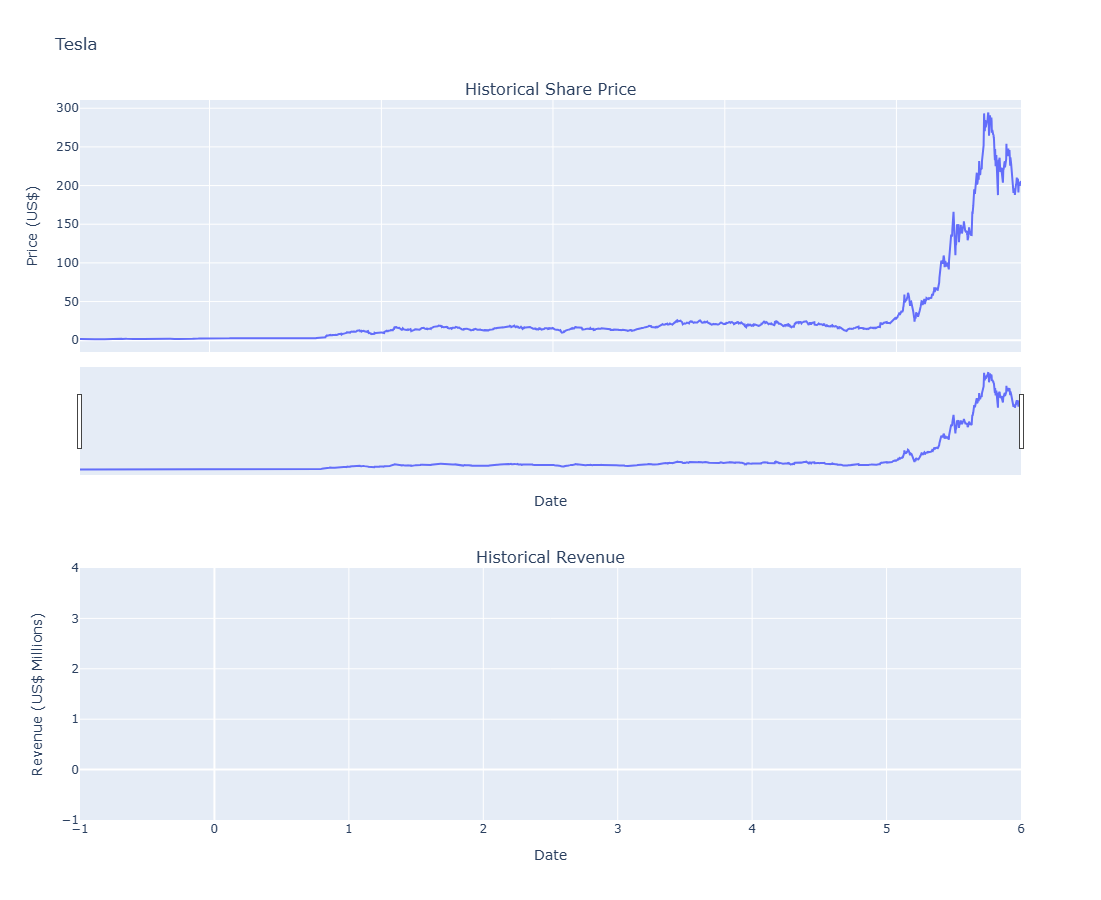

In [40]:
make_graph(tesla_data, tesla_revenue_df, 'Tesla')

        Date  Revenue
0 2020-04-30     1021
1 2020-01-31     2194
2 2019-10-31     1439
3 2019-07-31     1286
4 2019-04-30     1548


C:\Users\rodolfo.alarcon\AppData\Local\Temp\ipykernel_16508\2924847002.py:13: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\rodolfo.alarcon\AppData\Local\Temp\ipykernel_16508\2924847002.py:22: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



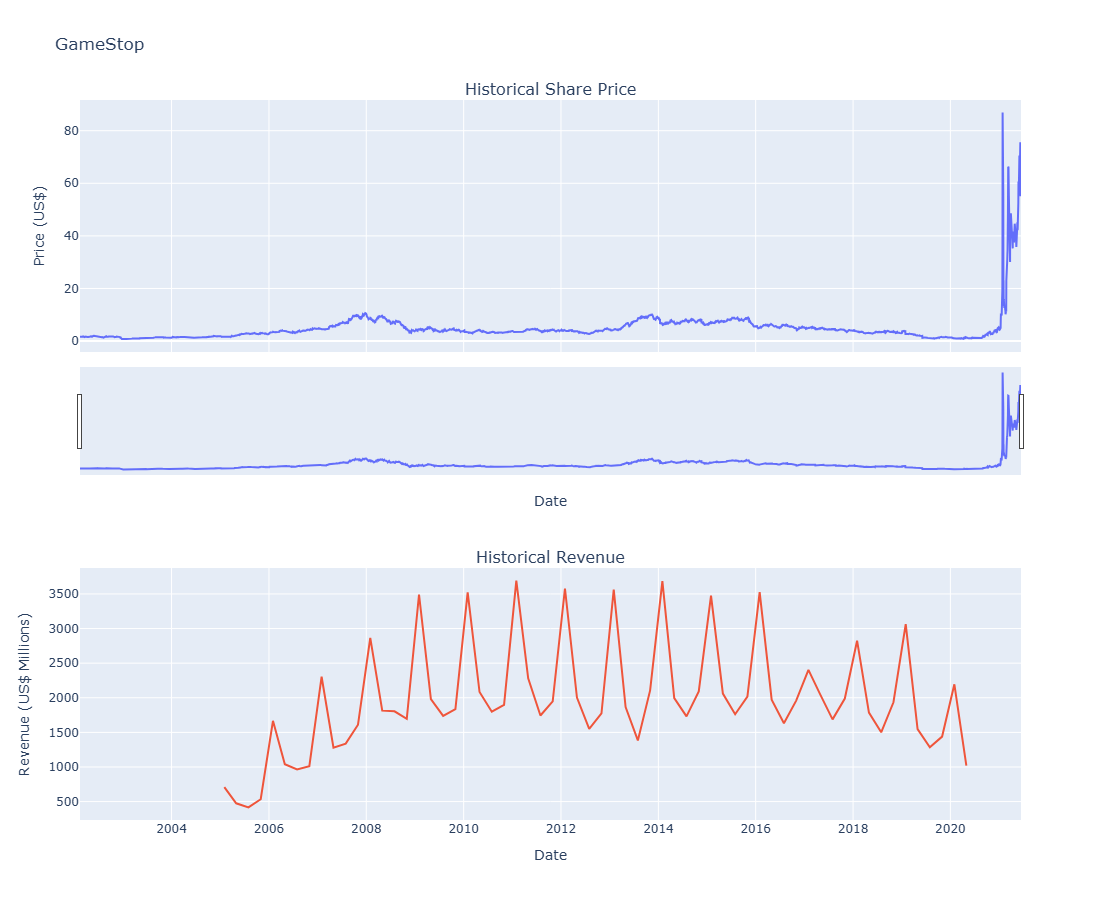

In [30]:
# Convertir la lista `gme_revenue` en un DataFrame
gme_revenue_df = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])

# Asegurarse de que la columna 'Date' esté en formato datetime
gme_revenue_df["Date"] = pd.to_datetime(gme_revenue_df["Date"], errors='coerce')

# Limpiar la columna 'Revenue':
# - Eliminar comas y símbolos de dólar
# - Reemplazar valores vacíos o nulos por NaN y luego eliminarlos
gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].str.replace(',', '', regex=True)
gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].str.replace('$', '', regex=True)
gme_revenue_df["Revenue"] = pd.to_numeric(gme_revenue_df["Revenue"], errors='coerce')

# Eliminar filas con valores nulos en las columnas 'Date' o 'Revenue'
gme_revenue_df.dropna(subset=["Date", "Revenue"], inplace=True)

# Verificar el resultado del DataFrame
print(gme_revenue_df.head())

# Generar el gráfico de GameStop usando la función make_graph
make_graph(gme_data, gme_revenue_df, 'GameStop')